# *Manejo de datos preliminares de tesis de Maestria*
## En este archivo pongo los analisis que pude hacer para mis datos que reuni hasta el momento en mi tesis de maestria.
- En el README esta mas a detalle que hize en mi estudio pero para recordarlo hize un estudio en 12 meses de recolecta de muestras de agua residual, aisle bacterias CPE para los cuales hize caracterizacion con pruebas fenotipicas.
- Ademas tome otros datos mas de las muestras de agua para tener mas cobertura de estudio.

In [1]:
# Para empezar hago una entrada de las librerias
import pandas as cpe
import matplotlib.pyplot as fip
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import folium
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Importo mis datos en formato .csv
carba = cpe.read_csv('/home/siles/comparar/InicioV/Para_Analisis.csv', sep =',') 
carba.head() # mostrar las primeras 5 filas de la base de datos

,Nro,Muestra,Salida,Mes,Latitud,Longitud,CE,pH,Temp,Altura,Coltot,Ecoli,AzulesCPE,RosadosCPE
0,1,Incachaca,Primera,Abril,-16.407638,-68.048807,295,7.83,7.9,4371,0.0,0.0,0.0,0.0
1,2,Holguin,Primera,Abril,-16.526349,-68.112383,2690,8.78,13.8,3316,15300000.0,5100000.0,20800.0,23700.0
2,3,Lipari,Primera,Abril,-16.608814,-68.067495,1672,8.47,12.5,3008,4000000.0,900000.0,5300.0,12500.0
3,4,Incachaca,Segunda,Abril,-16.407614,-68.048824,281,7.41,8.6,4347,139.0,1.6,0.0,0.0
4,5,Holguin,Segunda,Abril,-16.526323,-68.112414,2760,8.45,13.9,3324,19400000.0,4400000.0,52000.0,54000.0


In [3]:
carba.info() #informacion de los datos
carba.describe() #Est descriptivos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nro         36 non-null     int64  
 1   Muestra     36 non-null     object 
 2   Salida      36 non-null     object 
 3   Mes         36 non-null     object 
 4   Latitud     36 non-null     float64
 5   Longitud    36 non-null     float64
 6   CE          36 non-null     int64  
 7   pH          36 non-null     float64
 8   Temp        36 non-null     float64
 9   Altura      36 non-null     int64  
 10  Coltot      36 non-null     float64
 11  Ecoli       36 non-null     float64
 12  AzulesCPE   36 non-null     float64
 13  RosadosCPE  36 non-null     float64
dtypes: float64(8), int64(3), object(3)
memory usage: 4.1+ KB


,Nro,Latitud,Longitud,CE,pH,Temp,Altura,Coltot,Ecoli,AzulesCPE,RosadosCPE
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000
mean,18.500000,-16.510665,-68.076135,2424.888889,8.190833,10.816667,3576.500000,1.344170e+07,3.706945e+06,15498.563889,31011.111111
std,10.535654,0.085979,0.026989,1628.462549,0.554789,3.572874,576.025719,2.111906e+07,4.719559e+06,19345.511545,34740.522060
min,1.000000,-16.609486,-68.112416,281.000000,6.900000,2.500000,3008.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.750000,-16.608680,-68.112357,347.000000,7.655000,7.725000,3052.250000,1.342500e+02,1.600000e+00,0.000000,0.000000
50%,18.500000,-16.526332,-68.066974,2890.000000,8.450000,11.950000,3326.500000,1.075000e+07,2.400000e+06,7170.000000,16800.000000
75%,27.250000,-16.407604,-68.048825,3802.500000,8.592500,13.825000,4344.750000,1.532500e+07,5.025000e+06,23925.000000,55375.000000
max,36.000000,-16.404944,-68.048440,4500.000000,8.850000,15.400000,4388.000000,1.220000e+08,1.760000e+07,59000.000000,116000.000000


Dado que mis datos contienen coordenadas en decimales quize colocarlos en un mapa para mostrar los tres puntos de muestreo
donde tome muestras de agua a lo largo del Rio Choqueyapu

In [10]:
import folium

# Crear un mapa centrado en la media de las coordenadas
map_center = [carba['Latitud'].mean(), carba['Longitud'].mean()]
mapa = folium.Map(location=map_center, zoom_start=12)

# Añadir puntos al mapa
for idx, row in carba.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']]).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa.html")

## Ahora como en la otra base de datos, aqui hago directamente un grafico de dispersion de todas las variables

In [4]:
# Convertir las columnas a notación científica y reemplazar los valores originales
columnas_a_convertir = ['Coltot', 'Ecoli', 'AzulesCPE', 'RosadosCPE']
for columna in columnas_a_convertir:
    carba[columna] = carba[columna].apply(lambda x: '{:.2e}'.format(x) if cpe.notnull(x) else x)
carba

,Nro,Muestra,Salida,Mes,Latitud,Longitud,CE,pH,Temp,Altura,Coltot,Ecoli,AzulesCPE,RosadosCPE
0,1,Incachaca,Primera,Abril,-16.407638,-68.048807,295,7.83,7.9,4371,0.00e+00,0.00e+00,0.00e+00,0.00e+00
1,2,Holguin,Primera,Abril,-16.526349,-68.112383,2690,8.78,13.8,3316,1.53e+07,5.10e+06,2.08e+04,2.37e+04
2,3,Lipari,Primera,Abril,-16.608814,-68.067495,1672,8.47,12.5,3008,4.00e+06,9.00e+05,5.30e+03,1.25e+04
3,4,Incachaca,Segunda,Abril,-16.407614,-68.048824,281,7.41,8.6,4347,1.39e+02,1.60e+00,0.00e+00,0.00e+00
4,5,Holguin,Segunda,Abril,-16.526323,-68.112414,2760,8.45,13.9,3324,1.94e+07,4.40e+06,5.20e+04,5.40e+04
5,6,Lipari,Segunda,Abril,-16.609483,-68.066593,1755,8.36,14.9,3023,8.60e+06,2.90e+06,9.00e+03,5.00e+03
6,7,Incachaca,Tercera,Mayo,-16.407582,-68.048825,317,7.35,6.8,4338,1.44e+02,8.00e+00,0.00e+00,0.00e+00
7,8,Holguin,Tercera,Mayo,-16.526320,-68.112367,3730,8.77,15.4,3326,4.00e+07,1.50e+07,5.60e+04,8.60e+04
8,9,Lipari,Tercera,Mayo,-16.609486,-68.066604,2720,8.42,14.5,3022,1.26e+07,4.50e+06,8.00e+03,2.90e+04
9,10,Incachaca,Cuarta,Mayo,-16.407611,-68.058835,301,7.49,5.7,4344,2.56e+01,6.40e+00,0.00e+00,0.00e+00


Coltot        0
Ecoli         0
AzulesCPE     0
RosadosCPE    0
dtype: int64


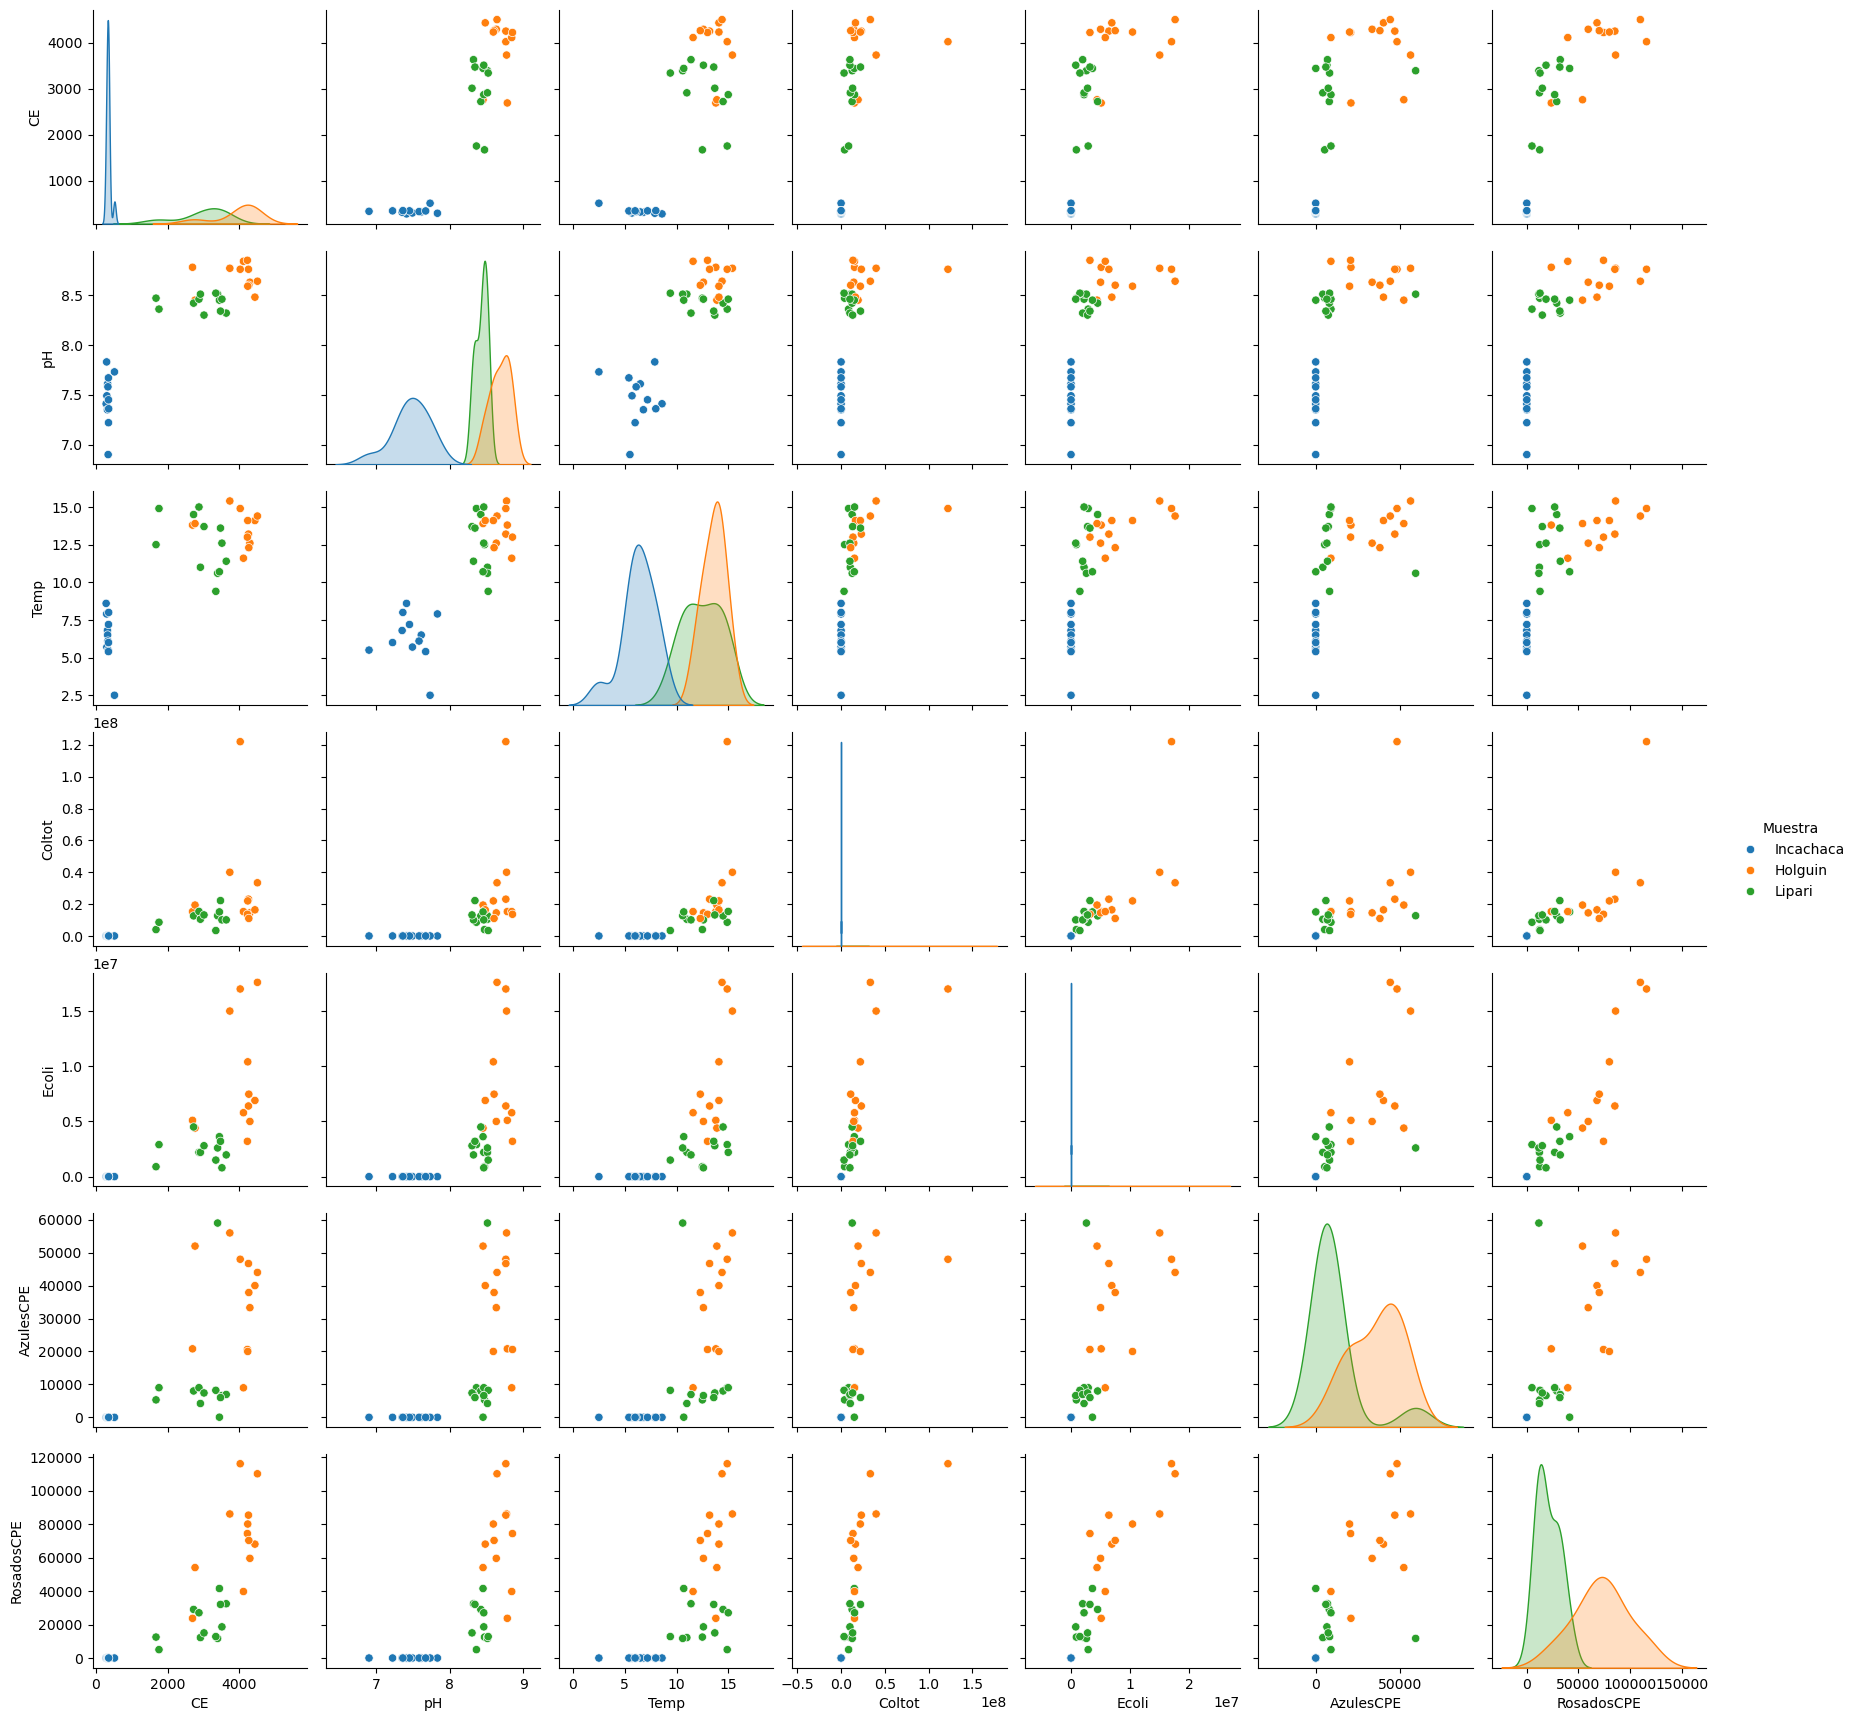

In [6]:
# Convertir columnas a formato numérico
columnas_a_convertir = ['Coltot', 'Ecoli', 'AzulesCPE', 'RosadosCPE']
for columna in columnas_a_convertir:
    carba[columna] = cpe.to_numeric(carba[columna], errors='coerce')

vars_of_interest = ['CE', 'pH', 'Temp', 'Coltot', 'Ecoli', 'AzulesCPE', 'RosadosCPE']
# Las columnas de interés son numéricas
for columna in columnas_a_convertir:
    carba[columna] = carba[columna].apply(lambda x: float('{:.2e}'.format(x)) if cpe.notnull(x) else x)

# Verifico que no haya valores nulos después de la conversión
print(carba[columnas_a_convertir].isnull().sum())

# Elimino valores nulos en las columnas de interés
carba = carba.dropna(subset=vars_of_interest)

# Exporto una matriz de gráficos de dispersión
sns.pairplot(carba, vars=vars_of_interest, hue='Muestra')

# Mostrar el gráfico
fip.show()

## En esta parte hago graficos de caja para cada variable en funcion de los tres sitios de muestreo

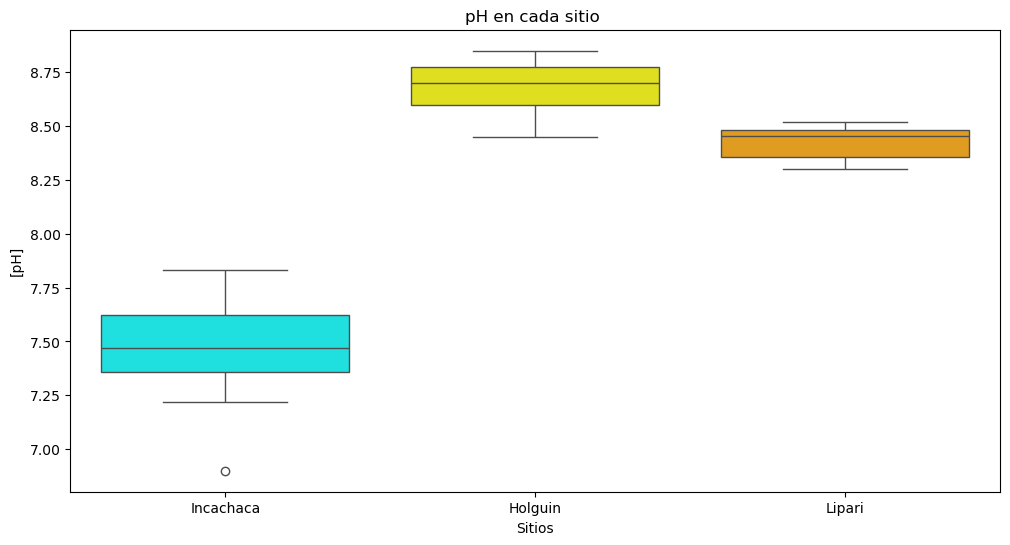

In [7]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['cyan', 'yellow', 'orange'] 
sns.boxplot(data=carba, x='Muestra', y='pH', hue='Muestra', palette=colores_personalizados, legend=False) 

def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('pH en cada sitio ')
fip.xlabel('Sitios') 
fip.ylabel('[pH]') 
fip.show()

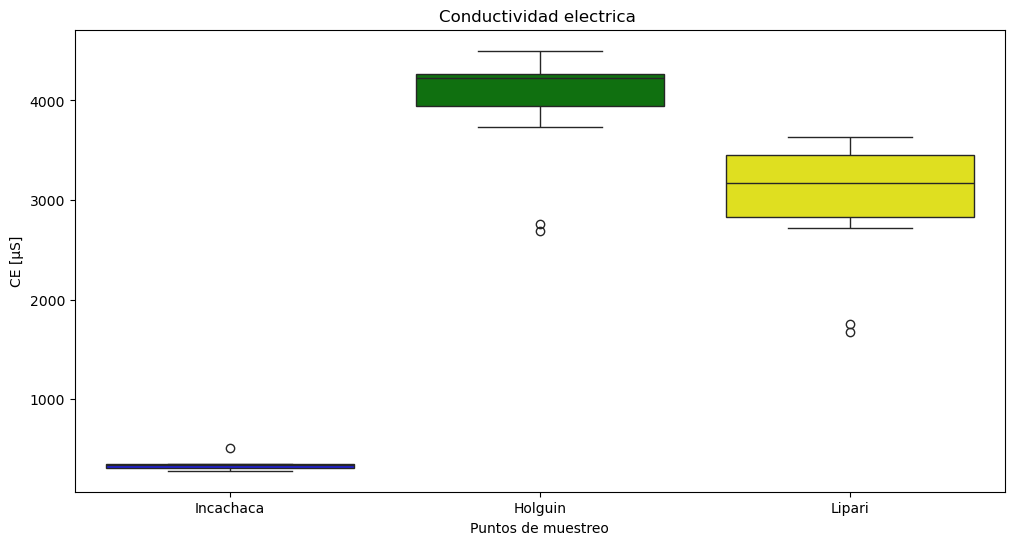

In [8]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['blue', 'green', 'yellow'] 
sns.boxplot(data=carba, x='Muestra', y='CE', hue='Muestra', palette=colores_personalizados, legend=False) 

def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('Conductividad electrica ')
fip.xlabel('Puntos de muestreo') 
fip.ylabel('CE [µS]') 
fip.show()

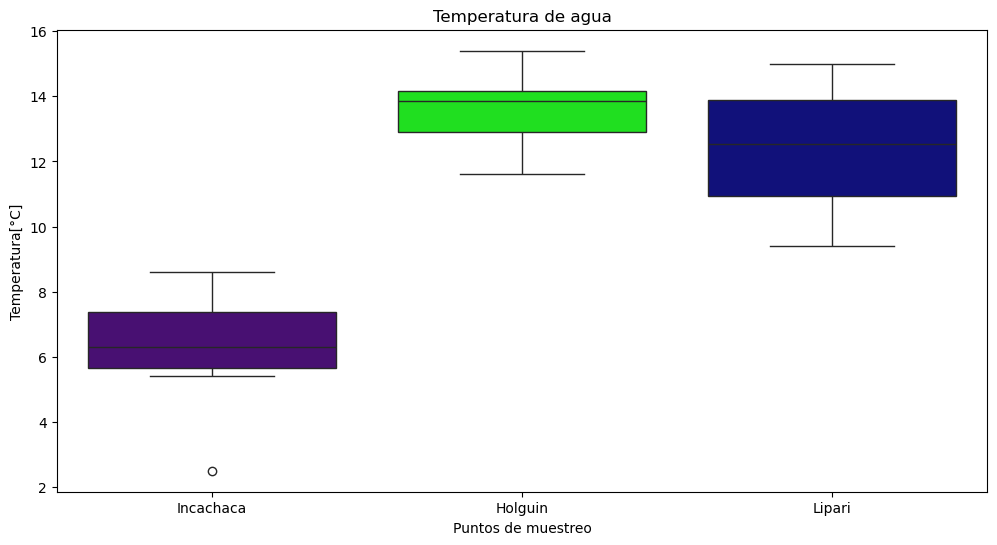

In [9]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['indigo', 'lime', 'darkblue'] 
sns.boxplot(data=carba, x='Muestra', y='Temp', hue='Muestra', palette=colores_personalizados, legend=False) 

def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('Temperatura de agua')
fip.xlabel('Puntos de muestreo') 
fip.ylabel('Temperatura[°C]') 
fip.show()

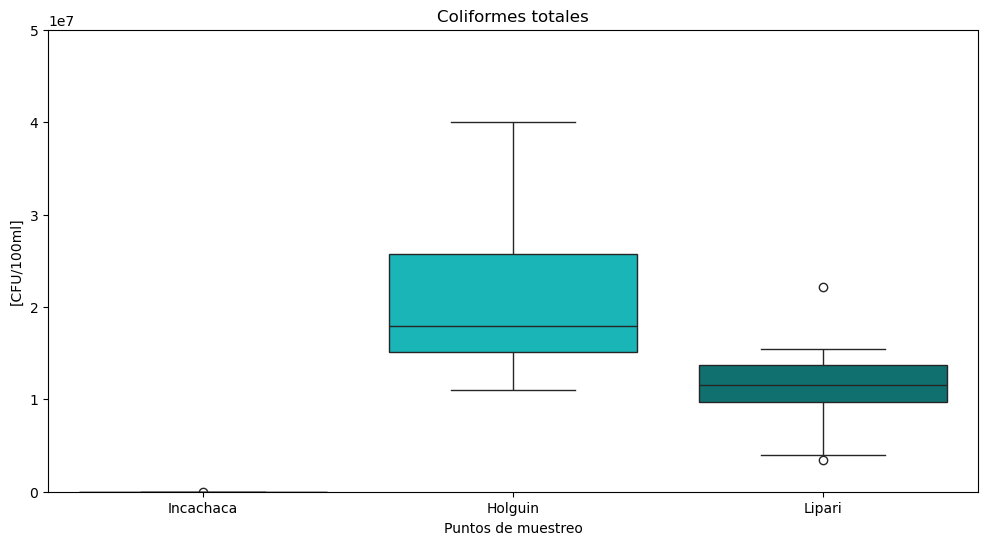

In [10]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['powderblue', 'darkturquoise', 'teal'] 
ax = sns.boxplot(data=carba, x='Muestra', y='Coltot', hue='Muestra', palette=colores_personalizados, legend=False) 
ax.set_ylim(0, 0.5e8)
def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('Coliformes totales')
fip.xlabel('Puntos de muestreo') 
fip.ylabel('[CFU/100ml]') 
fip.show()

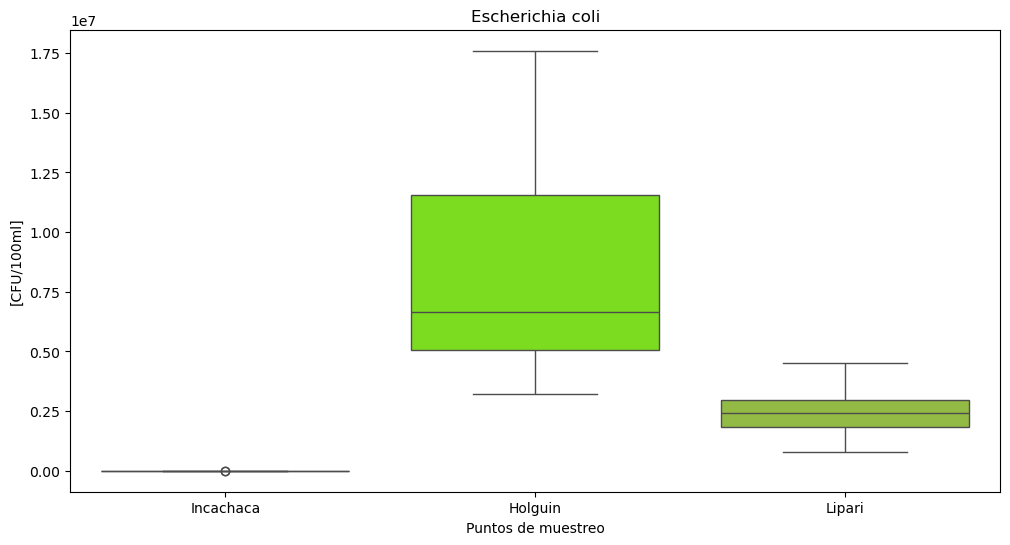

In [11]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['lightgreen', 'lawngreen', 'yellowgreen'] 
sns.boxplot(data=carba, x='Muestra', y='Ecoli', hue='Muestra', palette=colores_personalizados, legend=False) 

def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('Escherichia coli')
fip.xlabel('Puntos de muestreo') 
fip.ylabel('[CFU/100ml]') 
fip.show()

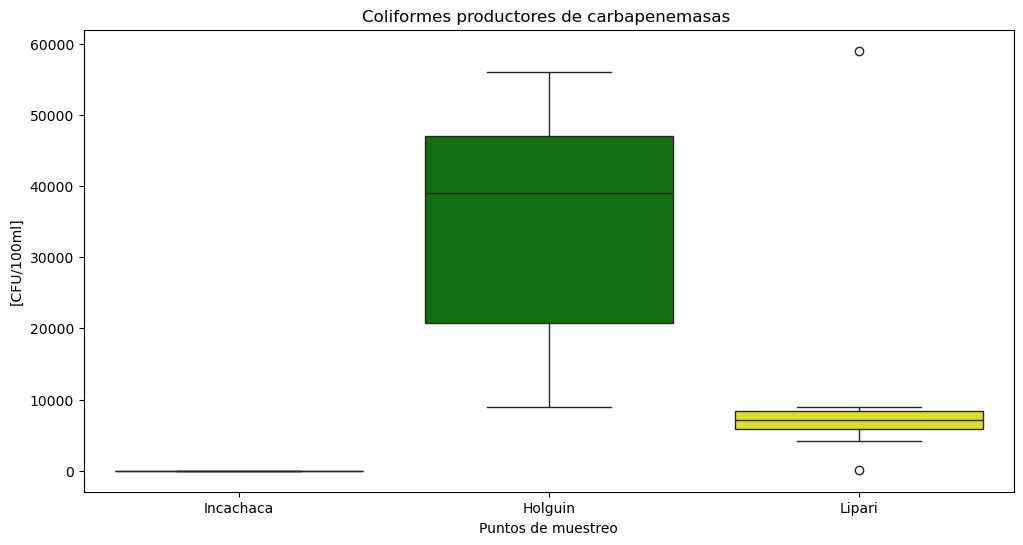

In [12]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['blue', 'green', 'yellow'] 
sns.boxplot(data=carba, x='Muestra', y='AzulesCPE', hue='Muestra', palette=colores_personalizados, legend=False) 

def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('Coliformes productores de carbapenemasas ')
fip.xlabel('Puntos de muestreo') 
fip.ylabel('[CFU/100ml]') 
fip.show()

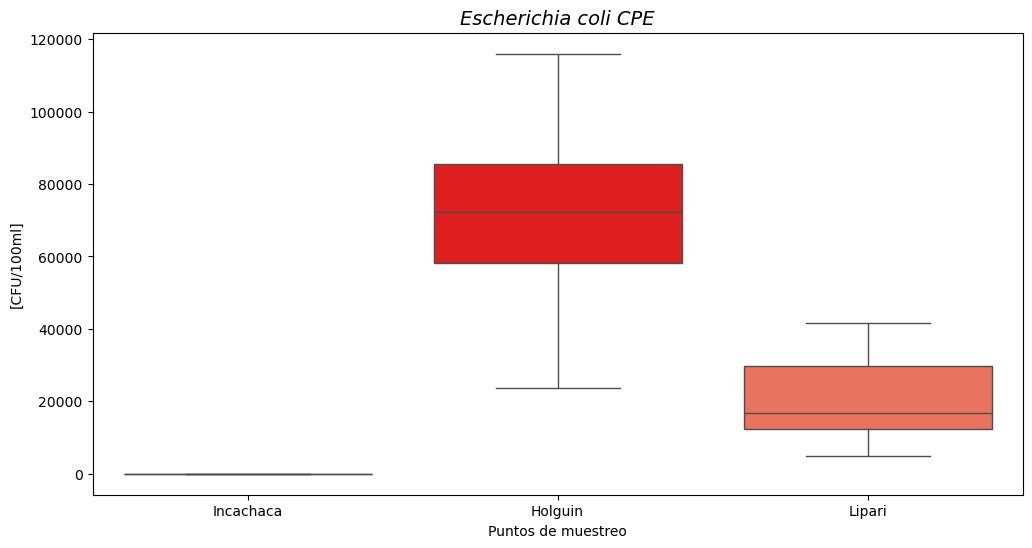

In [13]:
fip.figure(figsize=(12, 6))
colores_personalizados = ['peru', 'red', 'tomato'] 
sns.boxplot(data=carba, x='Muestra', y='RosadosCPE', hue='Muestra', palette=colores_personalizados, legend=False) 

def my_formatter(x, _): 
    return carba['Muestra'].unique()[int(x) % len(carba['Muestra'].unique())] 
fip.gca().xaxis.set_major_formatter(FuncFormatter(my_formatter))

# Personalizar el gráfico 
fip.title('Escherichia coli CPE', fontsize=14, fontstyle='italic')
fip.xlabel('Puntos de muestreo') 
fip.ylabel('[CFU/100ml]')  
fip.show()

Ahora hago una matriz de correlacion entre las diferentes variables

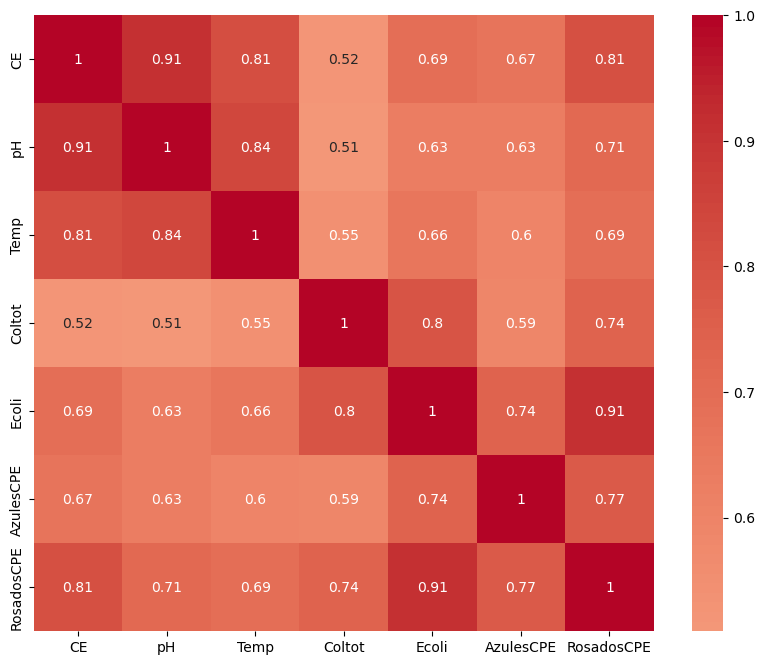

In [14]:
# En mi base de datos 'carba'

# Selecciono las variables específicas
selected_vars = ['CE', 'pH', 'Temp', 'Coltot', 'Ecoli', 'AzulesCPE', 'RosadosCPE']  
# Creo un DataFrame solo con las variables seleccionadas
selected_df = carba[selected_vars]

# Calcular la matriz de correlación para las variables seleccionadas
correlation_matrix = selected_df.corr()

# Tamaño del grafico
fip.figure(figsize=(10, 8))

# Matriz de correlacion en mapas de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Mostrar el gráfico
fip.show()

Segun esta matriz de correlacion algunas variables estan fuertemente correlacionadas, para mis intenciones de que querer hacer modelos lineales, es necesario hallar el factor de influenza de varianza(VIF) y explicar la relacion entre las variables predictorias que en este caso estoy considerando por el momento los datos de conteo de colonias en SuperCARBA de Escherichia coli CPE.

In [15]:
# Dentro de mi dataframe selecciono las variables predictoras:
variables_predictoras = ['CE', 'pH', 'Temp', 'Coltot', 'Ecoli']
# Creo un dataframe con las variables predictoras
X = carba[variables_predictoras]
# se debe hacer una constante para la interceptación en el modelo de regresión
X = sm.add_constant(X)
# Calcular el VIF para cada variable
vif_data = cpe.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable          VIF
0    const  1211.661550
1       CE     6.763678
2       pH     7.071827
3     Temp     3.843154
4   Coltot     2.793946
5    Ecoli     3.886245


In [16]:
# Entonces considero quitar CE y pH y hago las correlaciones
carba_reducido = carba.drop(columns=['CE', 'pH'])
carba_reducido
variables_predictoras = ['Temp', 'Coltot', 'Ecoli', 'AzulesCPE', 'RosadosCPE']
correlaciones = carba_reducido[variables_predictoras].corr()
print(correlaciones)

                Temp    Coltot     Ecoli  AzulesCPE  RosadosCPE
Temp        1.000000  0.545508  0.660087   0.600056    0.693856
Coltot      0.545508  1.000000  0.796605   0.588289    0.740406
Ecoli       0.660087  0.796605  1.000000   0.741013    0.909651
AzulesCPE   0.600056  0.588289  0.741013   1.000000    0.771151
RosadosCPE  0.693856  0.740406  0.909651   0.771151    1.000000


Ahora como quite algunas variables segun el valor VIF, voy a hacer una comparacion de modelos mediante modelos lineales con AIC, en este caso usare los datos de RosadoCPE para variable independiente y los demas como valores predictoras. Argumentando de como la temperatura, la cantidad de coliformes totales, coliformesCPe y la cantidad de ecoli totales afecta en la cantidad de EcoliCPE.

In [17]:
# Antes de comenzar el programa me salia error porque mis datos no los veia como numericos entonces uso este comando
# para transformarlo
carba_reducido['Coltot'] = cpe.to_numeric(carba_reducido['Coltot'], errors='coerce')
carba_reducido['AzulesCPE'] = cpe.to_numeric(carba_reducido['AzulesCPE'], errors='coerce')
carba_reducido['Ecoli'] = cpe.to_numeric(carba_reducido['Ecoli'], errors='coerce')
carba_reducido['Temp'] = cpe.to_numeric(carba_reducido['Temp'], errors='coerce')
# ahora creo modelos para una sola variable predictora
modelo_A = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Coltot']])).fit()
modelo_B = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['AzulesCPE']])).fit()
modelo_C = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Ecoli']])).fit()
# Modelos de dos variables predictoras
modelo_dos_predictores = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Coltot', 'Ecoli']])).fit()
modelo_dos_predictores1 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['AzulesCPE', 'Ecoli']])).fit()
modelo_dos_predictores2 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Temp', 'Ecoli']])).fit()
modelo_dos_predictores3 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Coltot', 'Temp']])).fit()
modelo_dos_predictores4 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['AzulesCPE', 'Coltot']])).fit()
# Modelos con tres variables predictoras
modelo_tres_predictores1 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Coltot', 'Ecoli', 'AzulesCPE']])).fit()
modelo_tres_predictores2 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Coltot', 'Ecoli', 'Temp']])).fit()
modelo_tres_predictores3 = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Ecoli', 'Temp', 'AzulesCPE']])).fit()
# Crear el modelo global
modelo_global = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(carba_reducido[['Coltot', 'Ecoli','AzulesCPE','Temp']])).fit()
# Crear el modelo nulo
modelo_nulo = sm.OLS(carba_reducido['RosadosCPE'], sm.add_constant(cpe.Series([1]*len(carba_reducido)))).fit()
# Calcular AIC para cada modelo
AIC_A = modelo_A.aic
AIC_B = modelo_B.aic
AIC_C = modelo_C.aic
AIC_global = modelo_global.aic
AIC_nulo = modelo_nulo.aic 

AIC_dos_predictores = modelo_dos_predictores.aic
AIC_dos_predictores1 = modelo_dos_predictores1.aic
AIC_dos_predictores2 = modelo_dos_predictores2.aic
AIC_dos_predictores3 = modelo_dos_predictores3.aic
AIC_dos_predictores4 = modelo_dos_predictores4.aic

AIC_tres_predictores1 = modelo_tres_predictores1.aic
AIC_tres_predictores2 = modelo_tres_predictores2.aic
AIC_tres_predictores3 = modelo_tres_predictores3.aic

print("AIC Para Coliformes totales:", AIC_A)
print("AIC Coliformes CPE:", AIC_B)
print("AIC Escherichia coli totales:", AIC_C)
print("AIC para el modelo global:", AIC_global)
print("AIC para el modelo nulo:", AIC_nulo)

print("AIC para Coliformes totales + Escherichia coli totales:", AIC_dos_predictores)
print("AIC para Coliformes CPE + Escherichia coli totales:", AIC_dos_predictores1)
print("AIC para Temperatura y Escherichia coli totales:", AIC_dos_predictores2)
print("AIC para Coliformes totales + Temperatura:", AIC_dos_predictores3)
print("AIC para Coliformes CPE + Coliformes totales:", AIC_dos_predictores4)

print("AIC para Coliformes totales + E.coli totales + Coliformes CPE:", AIC_tres_predictores1)
print("AIC para Coliformes totales + E.coli totales + Temperatura:", AIC_tres_predictores2)
print("AIC para E.coli totales + Temperatura + Coliformes CPE:", AIC_tres_predictores3)

AIC Para Coliformes totales: 829.3544288979665
AIC Coliformes CPE: 825.4468065440062
AIC Escherichia coli totales: 794.6995331038378
AIC para el modelo global: 793.7187324235006
AIC para el modelo nulo: 855.9570916671231
AIC para Coliformes totales + Escherichia coli totales: 796.5571848227082
AIC para Coliformes CPE + Escherichia coli totales: 792.0498870157724
AIC para Temperatura y Escherichia coli totales: 793.3195793137033
AIC para Coliformes totales + Temperatura: 820.2740895903812
AIC para Coliformes CPE + Coliformes totales: 814.0770538335624
AIC para Coliformes totales + E.coli totales + Coliformes CPE: 793.8788517015468
AIC para Coliformes totales + E.coli totales + Temperatura: 795.221007255421
AIC para E.coli totales + Temperatura + Coliformes CPE: 791.8468663032289


/home/siles/miniconda3/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/tsatools.py:162: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


In [18]:
# Creo una lista de los AIC
AICs = [AIC_A, AIC_B, AIC_C, AIC_global, AIC_nulo, AIC_dos_predictores, AIC_dos_predictores1, AIC_dos_predictores2, 
        AIC_dos_predictores3, AIC_dos_predictores4, AIC_tres_predictores1, AIC_tres_predictores2, AIC_tres_predictores3]

# Calcular el delta AIC
delta_AIC = [aic - min(AICs) for aic in AICs]

# Calcular el peso de Akaike
exp_delta_AIC = [np.exp(-0.5 * delta) for delta in delta_AIC]
sum_exp_delta_AIC = sum(exp_delta_AIC)
peso_Akaike = [val / sum_exp_delta_AIC for val in exp_delta_AIC]

# Colocar los resultados en un nuevo dataframe
resultados = cpe.DataFrame({
    'Modelo': ['Coltot', 'ColCPE', 'Temp', 'Global', 'Nulo', 'Coltot + Ecoli total', 
    'ColCPE + Ecoli total','Temp + Ecoli total', 'Coltot + Temp','ColCPE + Coltot',
    'Coltot + Ecoli total + ColiCPE','Coltot + Ecoli total + Temp', 'E.coli total + Temp + ColCPE'],
    'AIC': AICs,
    'Delta AIC': delta_AIC,
    'Peso de Akaike': peso_Akaike
})
resultados

,Modelo,AIC,Delta AIC,Peso de Akaike
0,Coltot,829.354429,37.507563,1.959941e-09
1,ColCPE,825.446807,33.599940,1.382842e-08
2,Temp,794.699533,2.852667,6.568377e-02
3,Global,793.718732,1.871866,1.072596e-01
4,Nulo,855.957092,64.110225,3.277542e-15
5,Coltot + Ecoli total,796.557185,4.710319,2.594622e-02
6,ColCPE + Ecoli total,792.049887,0.203021,2.470708e-01
7,Temp + Ecoli total,793.319579,1.472713,1.309517e-01
8,Coltot + Temp,820.274090,28.427223,1.836596e-07
9,ColCPE + Coltot,814.077054,22.230188,4.070829e-06


Segun la interpretacion del deltaAIC cuando es < 2 el modelo se ajusta mejor a los datos, para las variables medidas el modelo global con todas las variables afectan en la cantidad de Ecoli CPE (deltaAIC = 1.87), en tanto el modelo de ColiformesCPE mas E.coli totales y de temperatura mas Ecoli totales tienen influencia sobre la cantidad de Ecoli CPE. Asi mismo para el peso de akaike (w) los mismo modelos mencinados cubren la mayoria de los datos. como en todo analisis de este tipo el modelo nulo debe ser el que tenga un deltaAIC mas alto (deltaAIC = 64.11)